# Task 1b: Implement Code to Build the Term-Document Matrix

In [20]:
!pip install PyPDF2

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import PyPDF2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')
import nltk

def extract_text_from_pdf(pdf_file):
    text = ""
    with open(pdf_file, 'rb') as file:
        reader = PyPDF2.PdfReader(file)  # Use PdfReader instead of PdfFileReader
        text = ""
        for page_num in range(len(reader.pages)):  # reader.pages gives a list of pages
            page = reader.pages[page_num]
            text += page.extract_text()
        text = text.lower()  # Lowercasing
        tokens = nltk.word_tokenize(text)  # Tokenization
        stop_words = set(stopwords.words('english') + list(string.punctuation))
        words = [word for word in tokens if word not in stop_words and word.isalpha()]
        return " ".join(words)


book1 = extract_text_from_pdf(r"/content/drive/MyDrive/NLP/1.-Harry-Potter-and-the-Philosophers-Stone.pdf")
book2 = extract_text_from_pdf(r"/content/drive/MyDrive/NLP/2.-Harry-Potter-and-the-Chamber-of-Secrets.pdf")
book3 = extract_text_from_pdf(r"/content/drive/MyDrive/NLP/3.-Harry-Potter-and-the-Prisoner-of-Azkaban.pdf")
book4 = extract_text_from_pdf(r"/content/drive/MyDrive/NLP/4.-Harry-Potter-and-the-Goblet.pdf")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Text Preprocessing:


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

processed_text1 = preprocess_text(book1)
processed_text2 = preprocess_text(book2)
processed_text3 = preprocess_text(book3)
processed_text4 = preprocess_text(book4)


In [24]:
import time
from sklearn.feature_extraction.text import CountVectorizer

def ensure_string(text):
    if isinstance(text, list):
        return ' '.join(text)

def build_term_document_matrix(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    return X, vectorizer.get_feature_names_out()

documents = [
    ensure_string(processed_text1),
    ensure_string(processed_text2),
    ensure_string(processed_text3),
    ensure_string(processed_text4)
]

start_time = time.time()

term_document_matrix, terms = build_term_document_matrix(documents)

execution_time = time.time() - start_time


print("Term-Document Matrix (Raw Frequency):")
print(term_document_matrix.toarray())

print("\nTerms (Features):")
print(terms)

print(f"\nExecution Time: {execution_time} seconds")

Term-Document Matrix (Raw Frequency):
[[ 0  1  0 ...  2  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  3  0  0]
 [ 0  0  1 ... 11  1  3]]

Terms (Features):
['aaaaaaaaaaaaaarrrrrrrrrr' 'aaaaaaaaaaargh' 'aaaaaaaarrrrrgh' ...
 'zooming' 'éclair' 'éclairs']

Execution Time: 0.19888806343078613 seconds


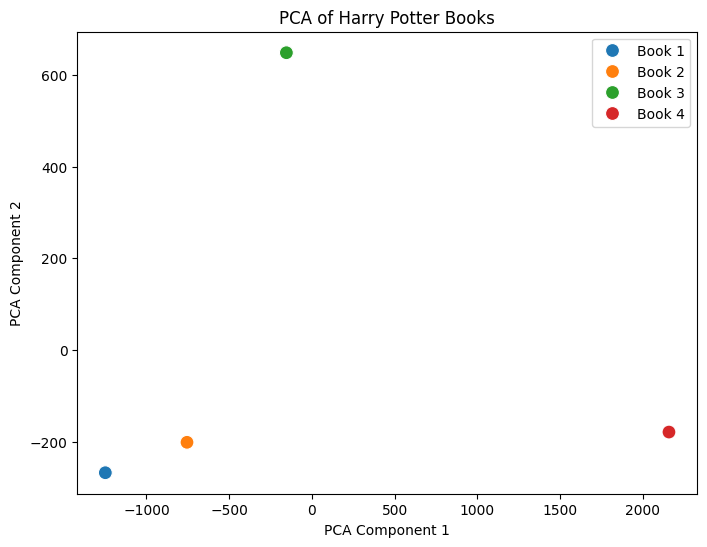

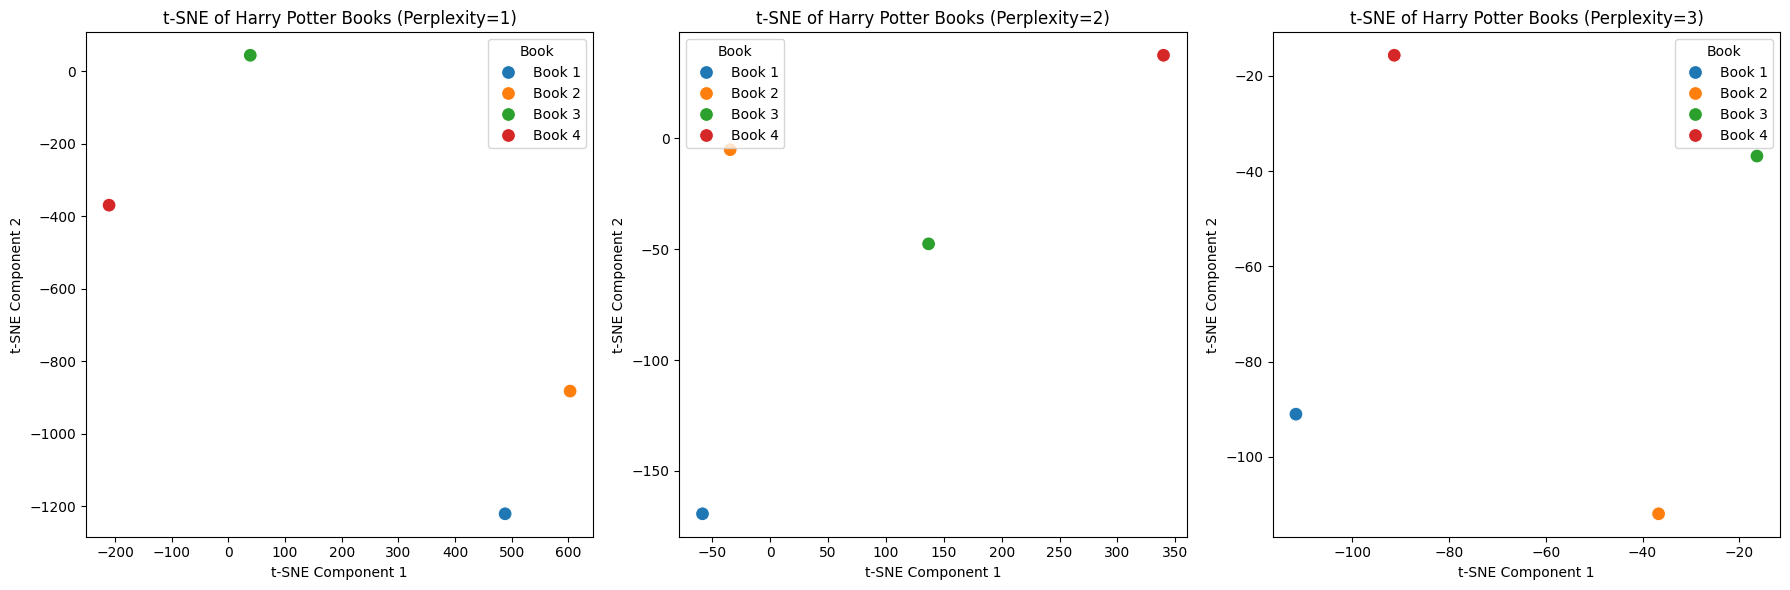

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
pca_result = pca.fit_transform(term_document_matrix.toarray())  # Convert sparse matrix to dense

# Create DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Book'] = [f'Book {i+1}' for i in range(len(documents))]

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Book', s=100)
plt.title('PCA of Harry Potter Books')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# plt.xticks([])
# plt.yticks([])
plt.legend()
plt.show()

# Create and plot t-SNE results for different perplexities
perplexities = [1, 2, 3]
plt.figure(figsize=(18, 6))

for i, perplexity in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)  # Adjust perplexity
    tsne_result = tsne.fit_transform(term_document_matrix.toarray())

    # Create DataFrame for t-SNE results
    tsne_df = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])
    tsne_df['Book'] = [f'Book {j+1}' for j in range(len(documents))]

    # Plot t-SNE results
    plt.subplot(1, 3, i)
    sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='Book', s=100)
    plt.title(f't-SNE of Harry Potter Books (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    # plt.xticks([])
    # plt.yticks([])

plt.tight_layout()
plt.show()

# Task 1c: Compute Similarities Using Euclidean Distance and Cosine Similarity

In [28]:
# Euclidean Distance
from sklearn.metrics.pairwise import euclidean_distances

euclidean_dist = euclidean_distances(term_document_matrix)
print("Euclidean Distance Matrix:\n", euclidean_dist)


Euclidean Distance Matrix:
 [[   0.          916.07204957 1463.16711281 3420.54191613]
 [ 916.07204957    0.         1134.2371886  2952.19189756]
 [1463.16711281 1134.2371886     0.         2456.47857715]
 [3420.54191613 2952.19189756 2456.47857715    0.        ]]


#task 1d

In [29]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

documents1 = [' '.join(processed_text1),
             ' '.join(processed_text2),
             ' '.join(processed_text3),
             ' '.join(processed_text4)]

representative_words = ['wizard', 'magical', 'harry', 'spells', 'witch', 'journey']

# Create a CountVectorizer with the selected words
vectorizer = CountVectorizer(vocabulary = representative_words)
term_document_matrix1 = vectorizer.fit_transform(documents1).toarray()

df = pd.DataFrame(term_document_matrix1, columns = representative_words)
print("Term-Document Matrix for Selected Words:\n", df)

Term-Document Matrix for Selected Words:
    wizard  magical  harry  spells  witch  journey
0      42       11   1308       6     12       11
1      47       16   1633       9     16        5
2      39       31   2035       2     42        6
3      83      125   3134      24     37       10


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(term_document_matrix)
print("Cosine Similarity Matrix:\n", cosine_sim)


Cosine Similarity Matrix:
 [[1.         0.94330203 0.94162659 0.9346896 ]
 [0.94330203 1.         0.95079405 0.95215991]
 [0.94162659 0.95079405 1.         0.94577844]
 [0.9346896  0.95215991 0.94577844 1.        ]]


In [31]:
# # Reduce dimensionality using Truncated SVD
# n_components = 2
# svd = TruncatedSVD(n_components=n_components)
# reduced_embeddings = svd.fit_transform(term_document_matrix1)

# print("Reduced Embeddings:\n", reduced_embeddings)

#Task 3

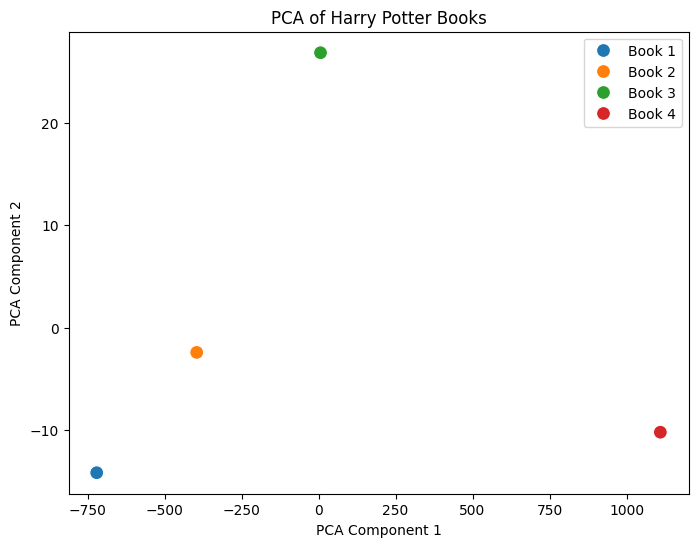

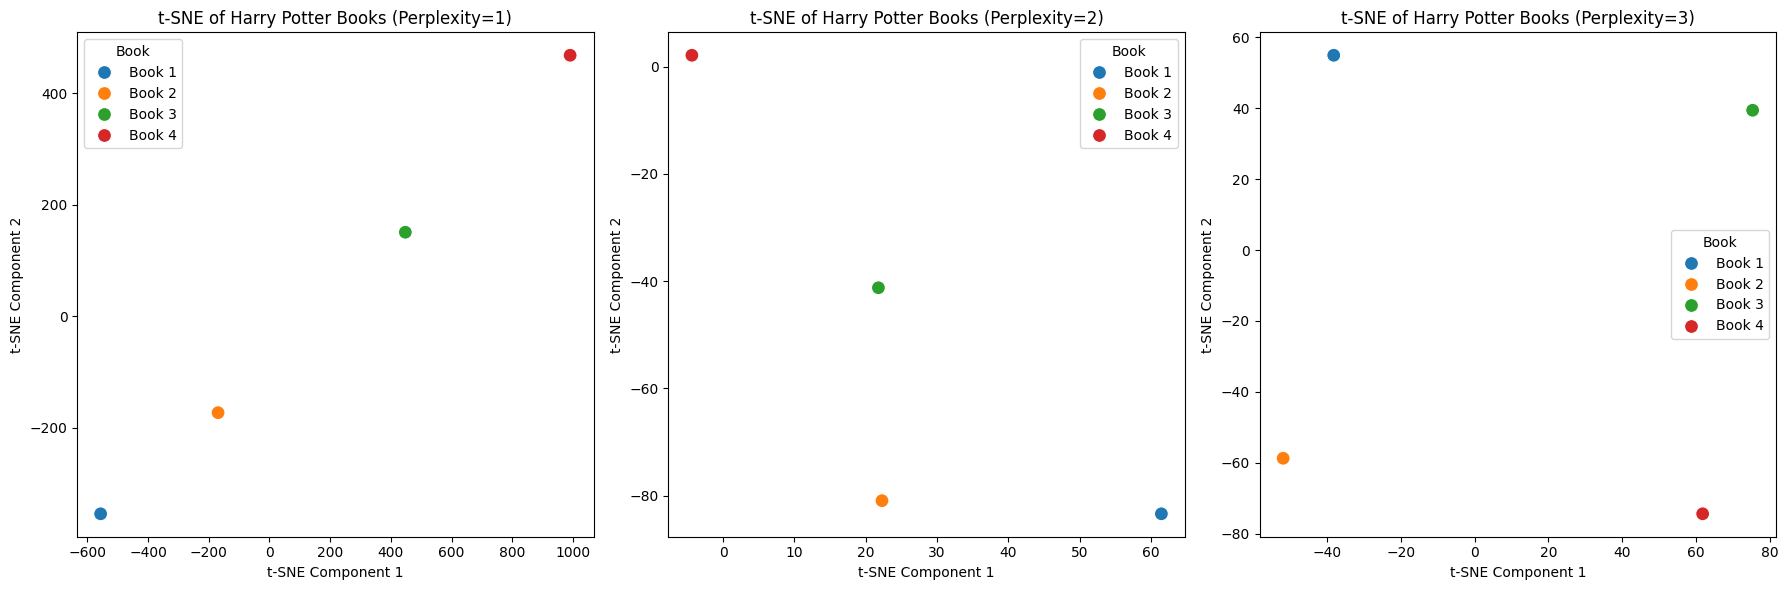

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
pca_result1 = pca.fit_transform(term_document_matrix1)  # Convert sparse matrix to dense

# Create DataFrame for PCA results
pca_df = pd.DataFrame(pca_result1, columns=['PCA1', 'PCA2'])
pca_df['Book'] = [f'Book {i+1}' for i in range(len(documents))]

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Book', s=100)
plt.title('PCA of Harry Potter Books')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# plt.xticks([])
# plt.yticks([])
plt.legend()
plt.show()

# Create and plot t-SNE results for different perplexities
perplexities = [1, 2, 3]
plt.figure(figsize=(18, 6))

for i, perplexity in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)  # Adjust perplexity
    tsne_result = tsne.fit_transform(term_document_matrix1)

    # Create DataFrame for t-SNE results
    tsne_df = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])
    tsne_df['Book'] = [f'Book {j+1}' for j in range(len(documents))]

    # Plot t-SNE results
    plt.subplot(1, 3, i)
    sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='Book', s=100)
    plt.title(f't-SNE of Harry Potter Books (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    # plt.xticks([])
    # plt.yticks([])

plt.tight_layout()
plt.show()

comapre to the visualization of 1b, adding representative_words helped a lot with the distribution of 4 books since it is 4 continuous book of a series.